# **FORECASTING DATA SAHAM INDOSAT DAN XL AXIATA**

**Author:** Gisella Serafina  
**GitHub:** [@serafiua](https://github.com/serafiua)  

## **Impor Data Saham dari Yahoo Finance**

In [ ]:
import yfinance as yf

stocks = ["ISAT.JK", "EXCL.JK"]
data = yf.download(stocks, start="2024-03-26", end="2025-03-26")["Close"]

[*********************100%***********************]  2 of 2 completed


In [19]:
print(data.head())

Ticker          EXCL.JK      ISAT.JK
Date                                
2024-03-26  2344.979004  2848.032471
2024-03-27  2237.051270  2738.492676
2024-03-28  2217.427979  2720.236084
2024-04-01  2227.239502  2695.893799
2024-04-02  2256.674316  2653.295166


In [20]:
# atur frekuensi ke hari kerja (business days) karena pada data asli ada beberapa hari yang tidak ada (tgl 29-31)
data = data.asfreq('B').interpolate()

## **Eksplorasi Data**

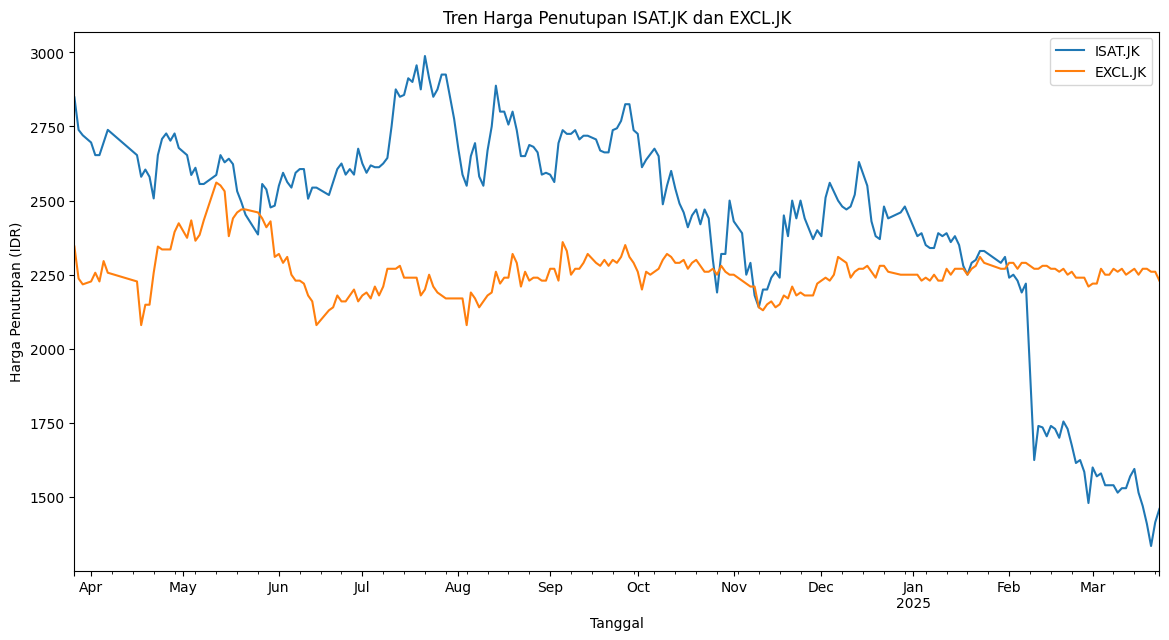

In [ ]:
# visualisi tren haraga penutupan

import matplotlib.pyplot as plt

data[stocks].plot(figsize=(14, 7)) 
plt.title("Tren Harga Penutupan ISAT.JK dan EXCL.JK")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (IDR)")
plt.legend(stocks)
plt.show()


In [22]:
# statistik deskriptif

print(data.describe())

Ticker      EXCL.JK      ISAT.JK
count    261.000000   261.000000
mean    2261.064651  2441.795513
std       78.914086   360.332135
min     2080.000000  1335.000000
25%     2222.333740  2360.000000
50%     2256.674316  2543.750000
75%     2290.000000  2665.466239
max     2560.834961  2987.500000


Perbandingan data:

1. Harga rata-rata ISAT.JK lebih tinggi dibanding EXCL.JK.
2. Volatilitas ISAT.JK lebih tinggi (std lebih besar), artinya harga sahamnya lebih fluktuatif dibandingkan EXCL.JK.
3. Median & Kuartil ISAT.JK lebih tinggi, menunjukkan kecenderungan harga saham yang lebih mahal dibanding EXCL.JK.

## **Forecasting (ARIMA)**


Forecasting untuk ISAT.JK
MAE: 509.73, MSE: 388228.48, RMSE: 623.08


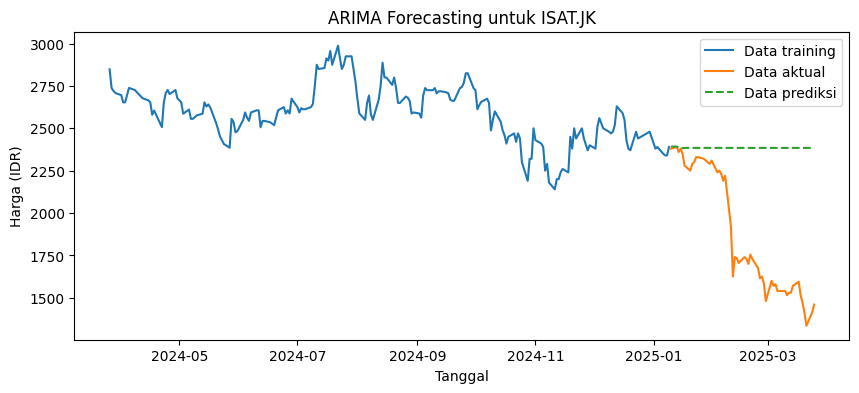


Forecasting untuk EXCL.JK
MAE: 33.08, MSE: 1345.27, RMSE: 36.68


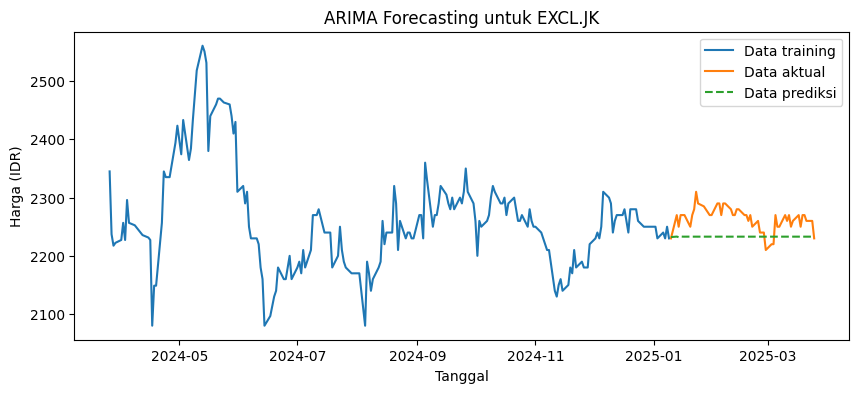

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

forecast_results = {}
for stock in stocks:
    print(f"\nForecasting untuk {stock}")
    train_size = int(len(data) * 0.8)
    train, test = data[stock][:train_size], data[stock][train_size:]
    
    # model ARIMA
    model = ARIMA(train, order=(5, 1, 0)) 
    model_fit = model.fit()
    
    # prediksi
    predictions = model_fit.forecast(steps=len(test))
    
    # evaluaasi model
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    forecast_results[stock] = (test, predictions)
    
    # plot hasil prediksi
    plt.figure(figsize=(10, 4))
    plt.plot(train.index, train, label="Data training")
    plt.plot(test.index, test, label="Data aktual")
    plt.plot(test.index, predictions, label="Data prediksi", linestyle="dashed")
    plt.title(f"ARIMA Forecasting untuk {stock}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga (IDR)")
    plt.legend()
    plt.show()

**1. Perbandingan MAE (Mean Absolute Error)** <br>
- ISAT.JK: 509.73 <br>
- EXCL.JK: 33.08 <br>

EXCL.JK memiliki error absolut rata-rata yang jauh lebih kecil dibandingkan ISAT.JK, yang berarti prediksi untuk EXCL.JK lebih dekat dengan nilai aktualnya dibanding ISAT.JK.

**2. Perbandingan MSE (Mean Squared Error)** <br>
- ISAT.JK: 388228.48 <br>
- EXCL.JK: 1345.27 <br>

MSE yang lebih kecil menunjukkan bahwa EXCL.JK memiliki prediksi yang lebih stabil dibandingkan ISAT.JK.

**3. Perbandingan RMSE (Root Mean Squared Error)** <br>
- ISAT.JK: 623.08 <br>
- EXCL.JK: 36.68 <br>

RMSE dari EXCL.JK jauh lebih kecil daripada ISAT.JK, yang berarti fluktuasi error prediksi lebih kecil di EXCL.JK dibandingkan ISAT.JK.

### **Kesimpulan**

1. Prediksi untuk EXCL.JK (XL Axiata) lebih akurat dan lebih stabil dibandingkan ISAT.JK (Indosat) berdasarkan ketiga metrik error (MAE, MSE, RMSE).

2. ISAT.JK memiliki volatilitas yang lebih tinggi, yang menyebabkan error forecasting menjadi lebih besar.